In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #%tensorflow_version 2.x
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from keras import callbacks
from keras.callbacks import CSVLogger
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import numpy as np
np.random.seed(0)

In [ ]:
import pandas as pd
df = pd.read_csv("drive/MyDrive/security_proj/columns38_final.csv")
#df.info()
df=df.drop('Unnamed: 0.1',axis=1)
x=df.iloc[:,df.columns != 'Label']
y=df.iloc[:,-1]
print("x\n",x.info())
y = pd.DataFrame(y)
print('y\n',y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1245798 non-null  int64  
 1    Source Port                 1245798 non-null  int64  
 2    Destination IP              1245798 non-null  int64  
 3    Destination Port            1245798 non-null  int64  
 4    Protocol                    1245798 non-null  int64  
 5   Total Length of Fwd Packets  1245798 non-null  float64
 6    Fwd Packet Length Max       1245798 non-null  float64
 7    Fwd Packet Length Min       1245798 non-null  float64
 8    Fwd Packet Length Mean      1245798 non-null  float64
 9   Bwd Packet Length Max        1245798 non-null  float64
 10   Bwd Packet Length Min       1245798 non-null  float64
 11   Bwd Packet Length Mean      1245798 non-null  float64
 12   Bwd Packet Length Std       1245798 non-n

In [ ]:
df.describe()

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,...,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,6.228985e+05,2.302203e+04,3.166084e+09,3.186662e+04,1.486217e+01,1.069863e+03,4.679689e+02,4.562818e+02,4.597351e+02,1.475077e+01,...,1.019186e-02,6.812989e+02,4.597351e+02,5.181360e+00,1.069863e+03,1.205828e+03,1.214158e+02,1.914283e+05,9.624289e-01,3.339989e+00
std,3.596310e+05,2.447340e+04,4.198623e+08,1.958453e+04,4.363049e+00,1.441733e+03,4.837410e+02,4.815043e+02,4.801285e+02,1.730104e+02,...,1.004390e-01,7.221197e+02,4.801285e+02,5.426732e+01,1.441733e+03,3.331159e+03,2.118996e+03,1.175897e+06,1.901566e-01,1.832971e+00
min,0.000000e+00,0.000000e+00,6.724045e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.114492e+05,7.690000e+02,3.232248e+09,1.479500e+04,1.700000e+01,4.580000e+02,2.290000e+02,2.290000e+02,2.290000e+02,0.000000e+00,...,0.000000e+00,3.435000e+02,2.290000e+02,0.000000e+00,4.580000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00
50%,6.228985e+05,9.447000e+03,3.232248e+09,3.190300e+04,1.700000e+01,4.940000e+02,2.470000e+02,2.470000e+02,2.470000e+02,0.000000e+00,...,0.000000e+00,3.705000e+02,2.470000e+02,0.000000e+00,4.940000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00
75%,9.343478e+05,4.755075e+04,3.232248e+09,4.894600e+04,1.700000e+01,1.398000e+03,4.840000e+02,4.720000e+02,4.720000e+02,0.000000e+00,...,0.000000e+00,7.080000e+02,4.720000e+02,0.000000e+00,1.398000e+03,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00
max,1.245797e+06,6.553400e+04,4.294967e+09,6.553500e+04,1.700000e+01,2.085240e+05,3.625000e+03,2.131000e+03,2.131000e+03,3.627000e+03,...,1.000000e+00,2.208000e+03,2.131000e+03,1.850769e+03,2.085240e+05,6.553500e+04,6.553500e+04,6.961402e+07,1.000000e+00,7.000000e+00


In [ ]:
# labels = 'UDPLag', 'Syn', 'UDP', 'NetBIOS','Portmap','MSSQL','BENIGN','LDAP'
# sizes = [len(df[df[' Label']=='UDPLag']), len(df[df[' Label']=='Syn']), 
#          len(df[df[' Label']=='UDP']), len(df[df[' Label']=='NetBIOS']),
#          len(df[df[' Label']=='Portmap']),len(df[df[' Label']=='MSSQL']),
#          len(df[df[' Label']=='BENIGN']),len(df[df[' Label']=='LDAP'])]
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','yellow','purple','grey','teal']
# explode = (0, 0.1, 0, 0,0,0,0,0)  # explode 1st slice

# # Plot
# plt.rcParams.update({'font.size': 22})
# plt.figure(figsize=(10,10))
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
# autopct='%1.1f%%', shadow=True, startangle=140)

# plt.axis('equal')
# plt.show()

In [ ]:
df[df['Label']==0][' Protocol'].count()

56965

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

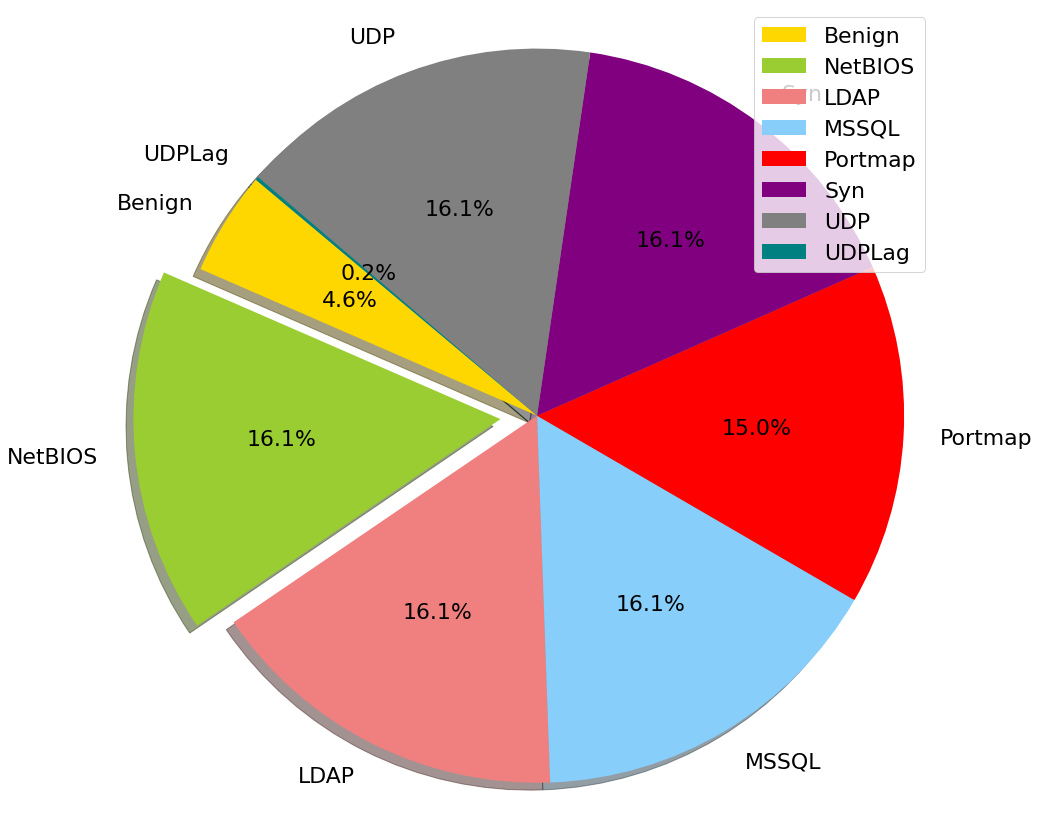

In [ ]:
labels = ['Benign', 'NetBIOS', 'LDAP', 'MSSQL','Portmap','Syn','UDP','UDPLag']
sizes = np.array([df[df['Label']==0][' Protocol'].count(),df[df['Label']==1][' Protocol'].count(),
                  df[df['Label']==2][' Protocol'].count(),df[df['Label']==3][' Protocol'].count(),
                  df[df['Label']==4][' Protocol'].count(),df[df['Label']==5][' Protocol'].count(),
                  df[df['Label']==6][' Protocol'].count(),df[df['Label']==7][' Protocol'].count()])
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','purple','grey','teal']
explode = (0, 0.1, 0, 0,0,0,0,0)  # explode 1st slice

# Plot
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15,15))
plt.pie(sizes, labels=labels,explode=explode, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
import seaborn as sns


In [ ]:
# plt.figure(figsize=(20,16))
# g1 = sns.scatterplot(y=' Total Fwd Packets', x='Total Length of Fwd Packets',
#                      sizes=(200, 400), size=' Flow Duration',data=df)

# gt = g1.twinx()
# t = sns.pointplot(y='Fwd Packets/s', x='Label', data=df, color='black', legend=False)
# gt.set_ylabel("Fwd Packets/s", fontsize=16)

Text(0, 0.5, ' Protocol')

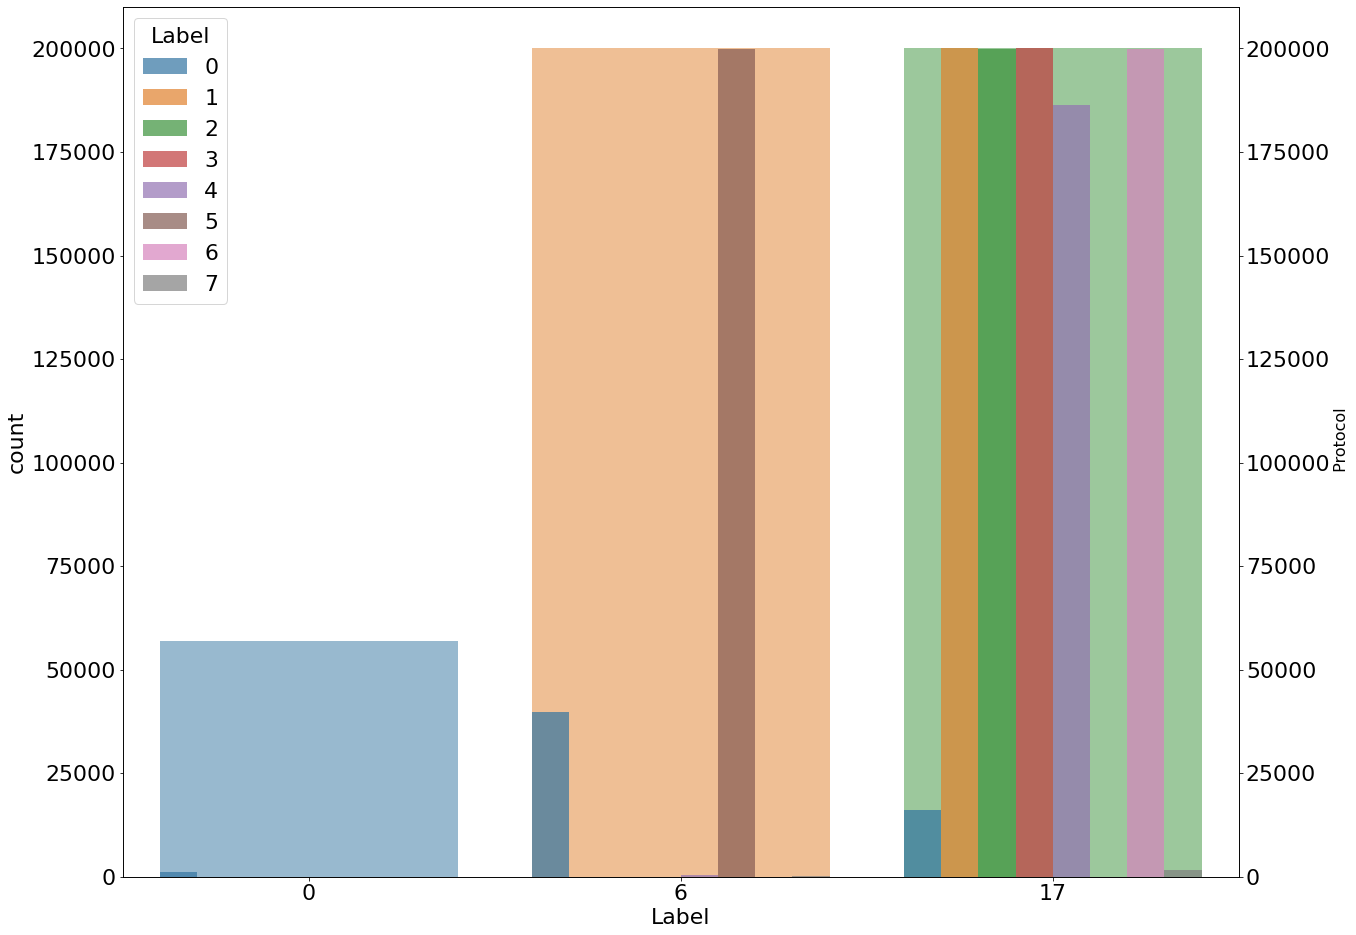

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x='Label', data=df,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Protocol', hue='Label',alpha=0.7, data=df)
gt.set_ylabel(" Protocol", fontsize=16)

Text(0, 0.5, ' Inbound')

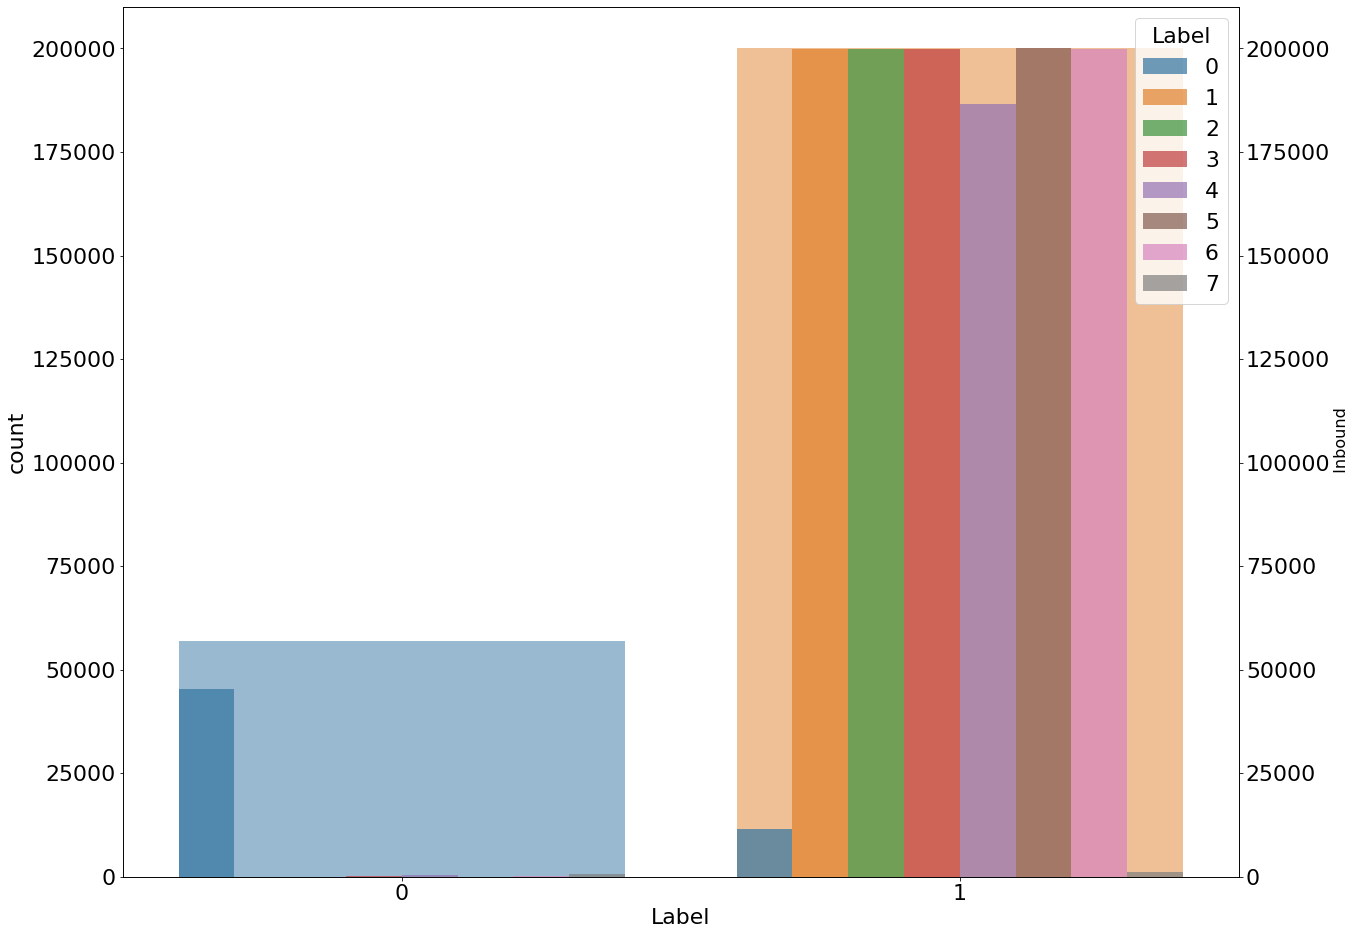

In [ ]:
plt.figure(figsize=(20,16))
g1 = sns.countplot(x='Label', data=df,alpha=0.5)
gt = g1.twinx()
gt = sns.countplot(x=' Inbound', hue='Label',alpha=0.7, data=df)
gt.set_ylabel(' Inbound', fontsize=16)

In [ ]:
# from sklearn import preprocessing
# scale = preprocessing.StandardScaler()
# X = scale.fit_transform(x)
# X_norm = preprocessing.normalize(x)

In [ ]:
 #normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

**Principal Component Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


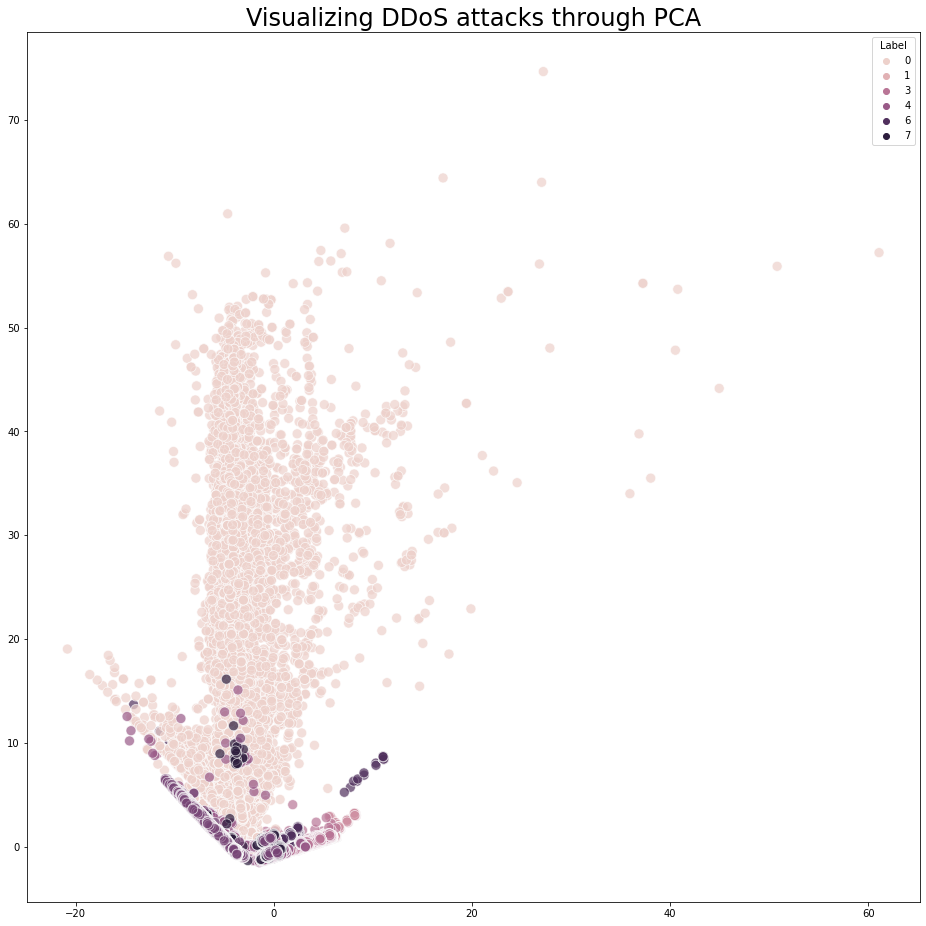

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(normalized_df)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(principalComponents[:, 0], principalComponents[:, 1], s= 100, hue=df['Label'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through PCA', fontsize=24);

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


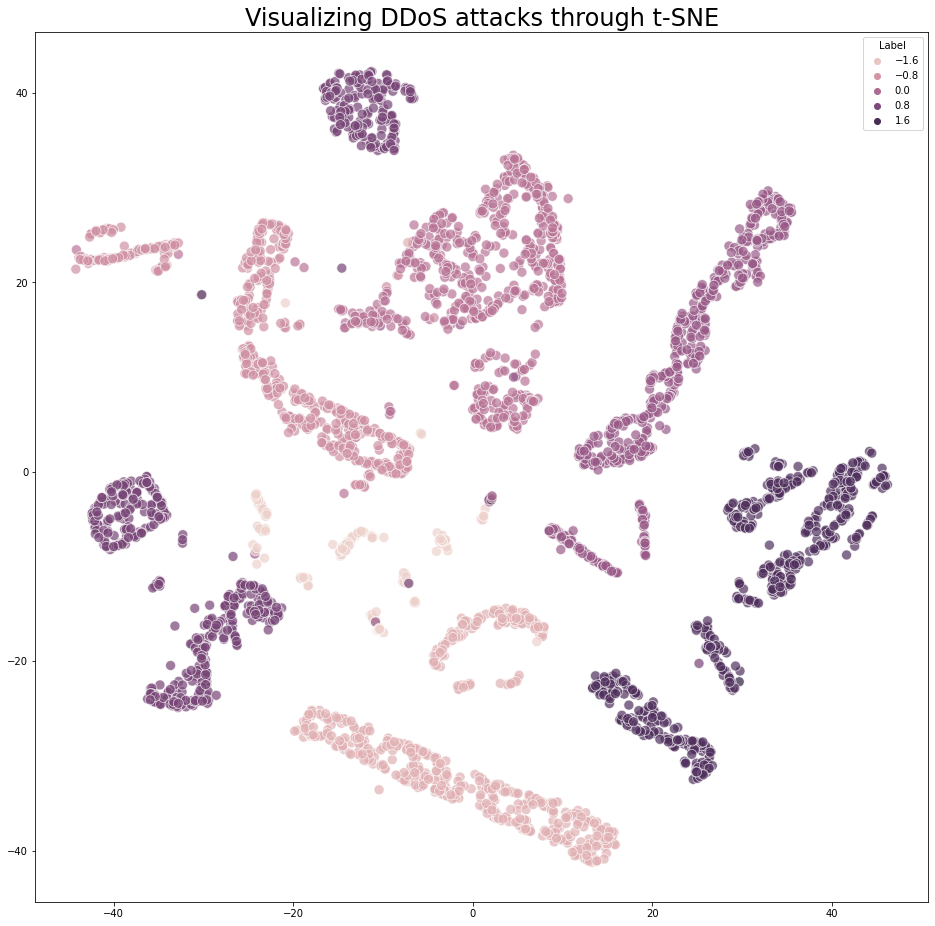

In [ ]:
from sklearn.manifold import TSNE
# pca_ = PCA(n_components=2) 
temp_df=normalized_df.sample(n=4000)
principalComponents = pca.fit_transform(temp_df)
tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300,learning_rate=7000).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(tsne_[:, 0], tsne_[:, 1], s= 100, hue=temp_df['Label'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24);

In [ ]:
# from sklearn.manifold import TSNE
# pca = PCA(n_components=50)
# X_pca = pca.fit_transform(normalized_df)

# # rows = np.arange(70000)
# # np.random.shuffle(rows)
# # n_select = 1245798

# tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, learning_rate=800)
# tsne_ = tsne.fit_transform(X_pca[rows[:n_select],:])
# # visualize
# plt.figure(figsize=(16,16))
# g1 = sns.scatterplot(tsne_[:, 0], tsne_[:, 1], s= 100, hue=df['Label'], cmap='Spectral',alpha=0.7)
# plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24)

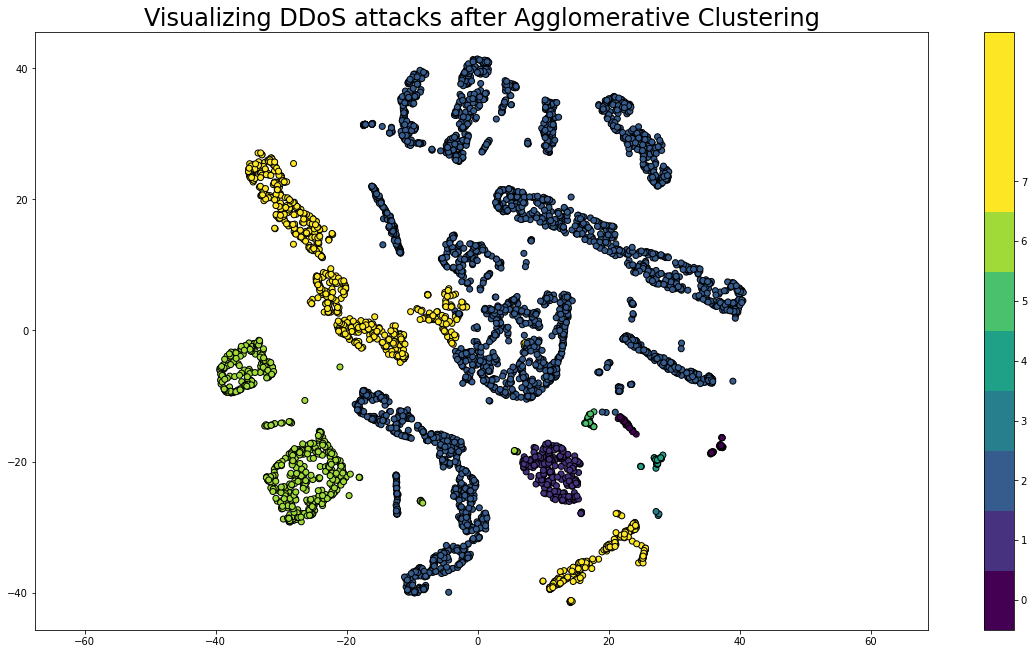

In [ ]:
from sklearn.cluster import AgglomerativeClustering
Agglo = AgglomerativeClustering(n_clusters=8)
Agglo.fit(principalComponents)
plt.figure(figsize=(20,11))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='black')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(8))
plt.title('Visualizing DDoS attacks after Agglomerative Clustering', fontsize=24);
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(100,200))
cor = normalized_df.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#df=df.drop('Unnamed: 0.1',axis=1)
normalized_df.describe()

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,-8.240064e-17,1.054733e-12,1.373855e-13,-4.158871e-15,-1.240177e-11,1.063288e-13,-8.237663e-13,2.961019e-12,-1.186983e-12,8.682086e-13,9.755238e-13,-8.253327e-13,-1.077336e-12,2.138927e-12,2.701441e-12,-2.322818e-12,1.352296e-12,7.837405e-13,1.950589e-12,3.237758e-12,1.526851e-12,-1.568473e-12,-7.298400e-13,7.837405e-13,-3.928092e-12,-2.100294e-12,-3.022469e-13,1.306471e-12,-1.186983e-12,-8.253385e-13,1.063288e-13,1.868235e-12,1.265760e-13,-1.166242e-12,-2.792804e-12,-4.782956e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.732049e+00,-9.406960e-01,-7.380619e+00,-1.627133e+00,-3.406373e+00,-7.420674e-01,-9.673956e-01,-9.476172e-01,-9.575252e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162110e-01,-2.229338e-01,-2.270074e-01,-2.225459e-01,-9.047062e-02,-1.335889e+00,-9.475020e-01,-9.527515e-01,-9.610563e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-9.434708e-01,-9.575252e-01,-9.547846e-02,-7.420674e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,-5.061243e+00,-1.822172e+00
25%,-8.660244e-01,-9.092742e-01,1.575856e-01,-8.716894e-01,4.899846e-01,-4.243941e-01,-4.940017e-01,-4.720244e-01,-4.805696e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,-1.293230e+00,-4.718853e-01,-4.948748e-01,-4.835507e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.677879e-01,-4.805696e-01,-9.547846e-02,-4.243941e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-7.310472e-01
50%,0.000000e+00,-5.546851e-01,1.575856e-01,1.857374e-03,4.899846e-01,-3.994241e-01,-4.567917e-01,-4.346415e-01,-4.430796e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,-4.345006e-01,-4.588845e-01,-4.460175e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.303980e-01,-4.430796e-01,-9.547846e-02,-3.994241e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-1.854849e-01
75%,8.660244e-01,1.002261e+00,1.575856e-01,8.720852e-01,4.899846e-01,2.275992e-01,3.313989e-02,3.264403e-02,2.554496e-02,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.161664e-01,-2.229338e-01,-2.270051e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,3.280845e-02,1.698744e-02,2.731780e-02,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,3.697599e-02,2.554496e-02,-9.547846e-02,2.275992e-01,-3.622846

In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)


In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_df.describe()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,1.054733e-12,1.373855e-13,-4.158871e-15,-1.240177e-11,1.063288e-13,-8.237663e-13,2.961019e-12,-1.186983e-12,8.682086e-13,9.755238e-13,-8.253327e-13,-1.077336e-12,2.138927e-12,2.701441e-12,-2.322818e-12,1.352296e-12,7.837405e-13,1.950589e-12,3.237758e-12,1.526851e-12,-1.568473e-12,-7.298400e-13,7.837405e-13,-3.928092e-12,-2.100294e-12,-3.022469e-13,1.306471e-12,-1.186983e-12,-8.253385e-13,1.063288e-13,1.868235e-12,1.265760e-13,-1.166242e-12,-2.792804e-12,-4.782956e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.406960e-01,-7.380619e+00,-1.627133e+00,-3.406373e+00,-7.420674e-01,-9.673956e-01,-9.476172e-01,-9.575252e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162110e-01,-2.229338e-01,-2.270074e-01,-2.225459e-01,-9.047062e-02,-1.335889e+00,-9.475020e-01,-9.527515e-01,-9.610563e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-9.434708e-01,-9.575252e-01,-9.547846e-02,-7.420674e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,-5.061243e+00,-1.822172e+00
25%,-9.092742e-01,1.575856e-01,-8.716894e-01,4.899846e-01,-4.243941e-01,-4.940017e-01,-4.720244e-01,-4.805696e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,-1.293230e+00,-4.718853e-01,-4.948748e-01,-4.835507e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.677879e-01,-4.805696e-01,-9.547846e-02,-4.243941e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-7.310472e-01
50%,-5.546851e-01,1.575856e-01,1.857374e-03,4.899846e-01,-3.994241e-01,-4.567917e-01,-4.346415e-01,-4.430796e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,-4.345006e-01,-4.588845e-01,-4.460175e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.303980e-01,-4.430796e-01,-9.547846e-02,-3.994241e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,-1.854849e-01
75%,1.002261e+00,1.575856e-01,8.720852e-01,4.899846e-01,2.275992e-01,3.313989e-02,3.264403e-02,2.554496e-02,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.161664e-01,-2.229338e-01,-2.270051e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,3.280845e-02,1.698744e-02,2.731780e-02,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,3.697599e-02,2.554496e-02,-9.547846e-02,2.275992e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01,9.056397e-01
max,1.737069e+00,2.688699e+00,1.719132e+00,4.8

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']


In [ ]:
normalized_x.describe()


,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
count,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06,1.245798e+06
mean,1.054733e-12,1.373855e-13,-4.158871e-15,-1.240177e-11,1.063288e-13,-8.237663e-13,2.961019e-12,-1.186983e-12,8.682086e-13,9.755238e-13,-8.253327e-13,-1.077336e-12,2.138927e-12,2.701441e-12,-2.322818e-12,1.352296e-12,7.837405e-13,1.950589e-12,3.237758e-12,1.526851e-12,-1.568473e-12,-7.298400e-13,7.837405e-13,-3.928092e-12,-2.100294e-12,-3.022469e-13,1.306471e-12,-1.186983e-12,-8.253385e-13,1.063288e-13,1.868235e-12,1.265760e-13,-1.166242e-12,-2.792804e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.406960e-01,-7.380619e+00,-1.627133e+00,-3.406373e+00,-7.420674e-01,-9.673956e-01,-9.476172e-01,-9.575252e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162110e-01,-2.229338e-01,-2.270074e-01,-2.225459e-01,-9.047062e-02,-1.335889e+00,-9.475020e-01,-9.527515e-01,-9.610563e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-9.434708e-01,-9.575252e-01,-9.547846e-02,-7.420674e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,-5.061243e+00
25%,-9.092742e-01,1.575856e-01,-8.716894e-01,4.899846e-01,-4.243941e-01,-4.940017e-01,-4.720244e-01,-4.805696e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,-1.293230e+00,-4.718853e-01,-4.948748e-01,-4.835507e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.677879e-01,-4.805696e-01,-9.547846e-02,-4.243941e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01
50%,-5.546851e-01,1.575856e-01,1.857374e-03,4.899846e-01,-3.994241e-01,-4.567917e-01,-4.346415e-01,-4.430796e-01,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.162100e-01,-2.229338e-01,-2.270067e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,-4.345006e-01,-4.588845e-01,-4.460175e-01,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,-4.303980e-01,-4.430796e-01,-9.547846e-02,-3.994241e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01
75%,1.002261e+00,1.575856e-01,8.720852e-01,4.899846e-01,2.275992e-01,3.313989e-02,3.264403e-02,2.554496e-02,-8.525948e-02,-1.383783e-01,-9.547846e-02,-7.687141e-02,-2.161664e-01,-2.229338e-01,-2.270051e-01,-2.225459e-01,-9.047062e-02,8.397680e-01,3.280845e-02,1.698744e-02,2.731780e-02,-6.973740e-02,-9.047062e-02,-4.525416e-01,-1.533709e-01,-1.014731e-01,3.697599e-02,2.554496e-02,-9.547846e-02,2.275992e-01,-3.622846e-01,-5.777066e-02,-1.627934e-01,1.975798e-01
max,1.737069e+00,2.688699e+00,1.719132e+00,4.899846e-01,1.438922e+02,6.526284e+00,3.478096e+00,3.480870e+00,2.087880e+01,1.169603e+02,3.400920e+01,

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train = np.array(y_train)

In [ ]:
normalized_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1245798 non-null  float64
 1    Destination IP              1245798 non-null  float64
 2    Destination Port            1245798 non-null  float64
 3    Protocol                    1245798 non-null  float64
 4   Total Length of Fwd Packets  1245798 non-null  float64
 5    Fwd Packet Length Max       1245798 non-null  float64
 6    Fwd Packet Length Min       1245798 non-null  float64
 7    Fwd Packet Length Mean      1245798 non-null  float64
 8   Bwd Packet Length Max        1245798 non-null  float64
 9    Bwd Packet Length Min       1245798 non-null  float64
 10   Bwd Packet Length Mean      1245798 non-null  float64
 11   Bwd Packet Length Std       1245798 non-null  float64
 12   Flow IAT Mean               1245798 non-n

In [ ]:
# y.info()

Stochastic gradient descent

In [ ]:
#stochastic gradient descent
from  sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn import metrics
sgd_model = SGDClassifier(loss="log", penalty="l2", max_iter=200)
sgd_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log', max_iter=200)

In [ ]:
y_pred = sgd_model.predict(X_test)
print("Stochastic Gradient Descent\nAccuracy =", metrics.accuracy_score(y_test, y_pred)*100)

Stochastic Gradient Descent
Accuracy = 77.0797880879756


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Stochastic Gradient Descent')

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Stochastic Gradient Descent
Accuracy =  77.0797880879756
Confusion Matrix =
 [[14125    29     0     0    39    65    27    36]
 [    0 46995     2     1  2751     2    11     0]
 [    3     9 49402   383    18     6     1     0]
 [    0     1   287 47912   626     0  1448     1]
 [   24 43773     0   116  2845   116    33    11]
 [    9     0     0     3     0 49651     0     1]
 [    3     0     0 21077    11     4 29060    12]
 [   25     0     0   206    52    20   143    75]]
Recall = 0.770797880879756
Classification Report =
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     14321
           1       0.52      0.94      0.67     49762
           2       0.99      0.99      0.99     49822
           3       0.69      0.95      0.80     50275
           4       0.45      0.06      0.11     46918
           5       1.00      1.00      1.00     49664
           6       0.95      0.58      0.72     50167
           7       0.55      

In [ ]:
yt = y_test.iloc[:,0]
yt=np.array(yt)

In [ ]:
y_pred[3]

2

Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_naiveB = GaussianNB()
model_naiveB.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
pred = model_naiveB.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Naive Bayes')

print('Accuracy = ', metrics.accuracy_score(y_test, pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, pred, average='macro'))

Naive Bayes
Accuracy =  78.31658372130357
Confusion Matrix =
 [[14215     0     0    31     0    58     0    17]
 [   52 49296     2   318     0     0    85     9]
 [    7     0 49342   457     0     3     0    13]
 [   17     0   199 32636     0     0 17393    30]
 [  156 46110     0   491     0     1    62    98]
 [    9     0     0     1     0 49651     2     1]
 [   42     0     0  1495     0     0 48593    37]
 [   47     0     0    30     0     2   258   184]]
Recall = 0.7831658372130358


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report =
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     14321
           1       0.52      0.99      0.68     49762
           2       1.00      0.99      0.99     49822
           3       0.92      0.65      0.76     50275
           4       0.00      0.00      0.00     46918
           5       1.00      1.00      1.00     49664
           6       0.73      0.97      0.83     50167
           7       0.47      0.35      0.40       521

    accuracy                           0.78    311450
   macro avg       0.70      0.74      0.71    311450
weighted avg       0.71      0.78      0.73    311450

F1 Score =  0.7069922093260133


**Decision** tree

In [ ]:
from sklearn import tree


In [ ]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

In [ ]:
pred = dtc.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Decsion tree')

print('Accuracy = ', metrics.accuracy_score(y_test, pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, pred, average='macro'))

Decsion tree
Accuracy =  86.80847648097608
Confusion Matrix =
 [[14315     0     0     1     4     1     0     0]
 [    0 29890     2     0 19869     0     0     1]
 [    1     0 49780    35     6     0     0     0]
 [    0     0    29 49546    13     1   677     9]
 [    3 19406     9    11 27456     2     2    29]
 [    1     0     1     2     0 49658     1     1]
 [    0     0     0   742     7     0 49332    86]
 [    0     0     0    13    25     3    92   388]]
Recall = 0.8680847648097608
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14321
           1       0.61      0.60      0.60     49762
           2       1.00      1.00      1.00     49822
           3       0.98      0.99      0.98     50275
           4       0.58      0.59      0.58     46918
           5       1.00      1.00      1.00     49664
           6       0.98      0.98      0.98     50167
           7       0.75      0.74      0.7

Logsitic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_m = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
pred = logreg_m.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Logistic regression')

print('Accuracy = ', metrics.accuracy_score(y_test, pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, pred, average='macro'))

Logistic regression
Accuracy =  82.11526729812168
Confusion Matrix =
 [[14191    16     0     0    47    66     1     0]
 [    2 42408     2    11  7337     2     0     0]
 [    5     9 49736    54    12     5     1     0]
 [    1     1   157 45621    69     0  4425     1]
 [   86 40655     2   121  5969    46     5    34]
 [    9     0     0     1     0 49651     2     1]
 [    4     0     0  2115     9     4 48007    28]
 [   23     0     0    55    31    14   233   165]]
Recall = 0.8211526729812169
Classification Report =
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     14321
           1       0.51      0.85      0.64     49762
           2       1.00      1.00      1.00     49822
           3       0.95      0.91      0.93     50275
           4       0.44      0.13      0.20     46918
           5       1.00      1.00      1.00     49664
           6       0.91      0.96      0.93     50167
           7       0.72      0.32  

Random forest classfier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model=RandomForestClassifier(n_estimators=100)

rfc_model=rfc_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
pred = rfc_model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Random Forest')

print('Accuracy = ', metrics.accuracy_score(y_test, pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, pred, average='macro'))

Logistic regression
Accuracy =  87.33376143843313
Confusion Matrix =
 [[14320     0     0     0     1     0     0     0]
 [    0 32464     3     0 17295     0     0     0]
 [    1     0 49777    40     4     0     0     0]
 [    0     0    19 49829     7     0   418     2]
 [    3 20722     5     8 26167     0     0    13]
 [    1     0     0     1     1 49659     1     1]
 [    0     0     0   707     9     0 49397    54]
 [    1     0     0    14    29     2    87   388]]
Recall = 0.8733376143843313
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14321
           1       0.61      0.65      0.63     49762
           2       1.00      1.00      1.00     49822
           3       0.98      0.99      0.99     50275
           4       0.60      0.56      0.58     46918
           5       1.00      1.00      1.00     49664
           6       0.99      0.98      0.99     50167
           7       0.85      0.74  

XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train, y_train,verbose=1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(objective='multi:softprob')

In [ ]:
pred=xgbmodel.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('XGBoost')

print('Accuracy = ', metrics.accuracy_score(y_test, pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, pred, average='macro'))

Logistic regression
Accuracy =  89.28174666880719
Confusion Matrix =
 [[14321     0     0     0     0     0     0     0]
 [    1 46887     3     0  2870     0     0     1]
 [    0     0 49765    39    13     5     0     0]
 [    0     1    19 50077    18     0   160     0]
 [    8 28575     7    65 18247     1     0    15]
 [    1     0     0     1     1 49659     2     0]
 [    1     0     0  1378     8     0 48763    17]
 [    1     0     0    17    41     0   113   349]]
Recall = 0.8928174666880719
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     14321
           1       0.62      0.94      0.75     49762
           2       1.00      1.00      1.00     49822
           3       0.97      1.00      0.98     50275
           4       0.86      0.39      0.54     46918
           5       1.00      1.00      1.00     49664
           6       0.99      0.97      0.98     50167
           7       0.91      0.67  

LightBGM

In [ ]:
from lightgbm import LGBMClassifier
lgb_model = LGBMClassifier(random_state=123)
lgb_model.fit(X_train, y_train)
lgb_model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8923583239685343

In [ ]:
lgb_model.fit(X_train, y_train)
lgb_model.score(X_test, y_test)

In [ ]:
y_pred = lgb_model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Light bgm')

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Light bgm
Accuracy =  89.23583239685343
Confusion Matrix =
 [[13827     4    17   145    36    13   270     9]
 [    2 46815     2     1  2932     2     0     8]
 [    2     0 49777    36     3     1     2     1]
 [    1     0    35 49850     8    22   291    68]
 [    5 28494     3    25 18349     1    11    30]
 [    2     0     1     1     0 49658     2     0]
 [    8     0     1   763    12     8 49288    87]
 [    2     2     2    28    35     1    90   361]]
Recall = 0.8923583239685343
Classification Report =
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     14321
           1       0.62      0.94      0.75     49762
           2       1.00      1.00      1.00     49822
           3       0.98      0.99      0.99     50275
           4       0.86      0.39      0.54     46918
           5       1.00      1.00      1.00     49664
           6       0.99      0.98      0.98     50167
           7       0.64      0.69      0.67  

Saving model

In [ ]:
import joblib
filename = '/content/drive/My Drive/ML_proj/sgb_model.sav'
joblib.dump(sgd_model, filename)

['/content/drive/My Drive/security_proj/sgb_model.sav']

In [ ]:
filename = '/content/drive/My Drive/ML_proj/model_naiveB.sav'
joblib.dump(model_naiveB, filename)

['/content/drive/My Drive/security_proj/model_naiveB.sav']

In [ ]:
filename = '/content/drive/My Drive/ML_proj/dtc.sav'
joblib.dump(dtc, filename)

['/content/drive/My Drive/security_proj/dtc.sav']

In [ ]:
filename = '/content/drive/My Drive/ML_proj/logreg_m.sav'
joblib.dump(logreg_m, filename)

['/content/drive/My Drive/security_proj/logreg_m.sav']

In [ ]:
filename = '/content/drive/My Drive/ML_proj/rfc_model.sav'
joblib.dump(rfc_model, filename)

['/content/drive/My Drive/security_proj/rfc_model.sav']

In [ ]:
filename = '/content/drive/My Drive/ML_proj/xgbmodel.sav'
joblib.dump(xgbmodel, filename)

['/content/drive/My Drive/security_proj/xgbmodel.sav']

In [ ]:
import joblib
filename = '/content/drive/My Drive/ML_proj/lgbmodel.sav'
joblib.dump(lgb_model, filename)

['/content/drive/My Drive/security_proj/lgbmodel.sav']

Load model

In [ ]:
import joblib
sgd_model = joblib.load('/content/drive/My Drive/ML_proj/sgb_model.sav')

In [ ]:
model_naiveB = joblib.load('/content/drive/My Drive/ML_proj/model_naiveB.sav')

In [ ]:
dtc = joblib.load('/content/drive/My Drive/ML_proj/dtc.sav')


In [ ]:
logreg_m = joblib.load('/content/drive/My Drive/ML_proj/logreg_m.sav')


In [ ]:
xgb_model = joblib.load('/content/drive/My Drive/ML_proj/xgbmodel.sav')


ensemble approach

In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
estimators = []
estimators.append(('sgd_n',sgd_model))
estimators.append(('model_naiveB_n',model_naiveB))
estimators.append(('dtc_n',dtc))
estimators.append(('logreg_m_n',logreg_m))
estimators.append(('lgm_model',lgb_model))
estimators.append(('rfc_model_n',rfc_model))
estimators.append(('xgbmodel_n',xgbmodel))


In [ ]:
ensemble = VotingClassifier(estimators,voting='hard')


In [ ]:
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)

Hard Voting Score  0


In [ ]:
print(ensemble.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.840767378391395


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Ensemble learning hrad voting')

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Ensemble learning hrad voting
Accuracy =  84.0767378391395
Confusion Matrix =
 [[14261     2     0     0     0    58     0     0]
 [    2 49170     2     6   582     0     0     0]
 [    5     9 49752    50     2     4     0     0]
 [    1     1   116 49023     3     0  1130     1]
 [   89 45206     3   108  1476    17     0    19]
 [    9     0     0     1     0 49651     2     1]
 [    4     0     0  1784    10     2 48341    26]
 [   28     0     1    21    11     9   268   183]]
Recall = 0.840767378391395
Classification Report =
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14321
           1       0.52      0.99      0.68     49762
           2       1.00      1.00      1.00     49822
           3       0.96      0.98      0.97     50275
           4       0.71      0.03      0.06     46918
           5       1.00      1.00      1.00     49664
           6       0.97      0.96      0.97     50167
           7       0.80    

Soft voting classfier

In [ ]:
estimators_soft = []
estimators_soft.append(('sgd_n',sgd_model))
estimators_soft.append(('model_naiveB_n',model_naiveB))
estimators_soft.append(('dtc_n',dtc))
estimators_soft.append(('logreg_m_n',logreg_m))
estimators.append(('lgm_model',lgb_model))
estimators.append(('xgboost',xgb_model))


# estimators.append(('rfc_model_n',rfc_model))
# estimators.append(('xgbmodel_n',xgbmodel))


In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_soft = VotingClassifier(estimators_soft,voting='soft')


In [ ]:
ensemble_soft.fit(X_train, y_train)
y_pred = ensemble_soft.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

In [ ]:
from sklearn.metrics import accuracy_score
print(ensemble_soft.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.830274522395248


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Ensemble approach soft learning')

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                  digits=2, 
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Ensemble approach soft learning
Accuracy =  83.0274522395248
Confusion Matrix =
 [[14254     0     0     0     9    58     0     0]
 [    2 48973     2    11   772     2     0     0]
 [    5     8 49539   252    13     5     0     0]
 [    2     0   160 46647    17     0  3447     2]
 [   85 45740     0   118   896    46     5    28]
 [    9     0     0     1     0 49651     2     1]
 [    4     0     0  1676     6     4 48445    32]
 [   27     0     0    14     8    14   274   184]]
Recall = 0.830274522395248
Classification Report =
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     14321
           1       0.52      0.98      0.68     49762
           2       1.00      0.99      1.00     49822
           3       0.96      0.93      0.94     50275
           4       0.52      0.02      0.04     46918
           5       1.00      1.00      1.00     49664
           6       0.93      0.97      0.95     50167
           7       0.74  

CNN model

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245798 entries, 0 to 1245797
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   Label   1245798 non-null  int64
dtypes: int64(1)
memory usage: 9.5 MB


In [ ]:
# y = pd.read_csv("/content/drive/My Drive/ML_proj/y.csv")
y=y['Label']
# x=x.drop(['Label'], axis=1)

In [ ]:
normalized_df=normalized_df.drop(['Label'], axis=1)

In [ ]:
# normalized_df=normalized_df.drop(['Unnamed: 0'], axis=1)
# normalized_df=normalized_df.drop(['Unnamed: 0.1'], axis=1)
# normalized_df=normalized_df.drop(['Unnamed: 0.1.1'], axis=1)
# normalized_df=normalized_df.drop(['Flow Bytes/s'], axis=1)
# normalized_df=normalized_df.drop([' Flow Packets/s'], axis=1)


In [ ]:
normalized_df.head()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
0,1.395596,0.157586,-0.607399,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,0.342849,0.015085,-0.076871,-0.178761,-0.175445,-0.178330,-0.168507,-0.090471,-1.335866,-0.935040,-0.940755,-0.948545,-0.069737,-0.090471,2.209740,-0.153371,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.19758
1,0.347887,0.157586,-1.625958,-2.031188,-0.733744,-0.954992,-0.935156,-0.945029,-0.050579,0.342849,0.015085,-0.076871,-0.216151,-0.222876,-0.227006,-0.222546,-0.090471,-1.324001,-0.935040,-0.940755,-0.948545,-0.069737,-0.090471,2.209740,-0.153371,-0.101473,-0.933085,-0.945029,0.015085,-0.733744,7.027636,-0.057299,-0.162793,0.19758
2,1.196809,0.157586,-0.560525,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,0.342849,0.015085,-0.076871,-0.182709,-0.180450,-0.183461,-0.174204,-0.090471,-1.335864,-0.935040,-0.940755,-0.948545,-0.069737,-0.090471,2.209740,-0.153371,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.19758
3,0.892029,0.157586,-1.562081,-2.031188,-0.725421,-0.954992,-0.935156,-0.945029,-0.050579,0.342849,0.015085,-0.076871,-0.186161,-0.184840,-0.187948,-0.179186,-0.090471,-1.335861,-0.935040,-0.940755,-0.948545,-0.069737,-0.090471,2.209740,-0.153371,-0.101473,-0.933777,-0.945029,0.015085,-0.725421,-0.054584,-0.057299,-0.162793,0.19758
4,-0.914218,0.157586,0.169285,0.489985,-0.424394,-0.494002,-0.472024,-0.480570,-0.085259,-0.138378,-0.095478,-0.076871,-0.216208,-0.222934,-0.227005,-0.222546,-0.090471,-0.610670,-0.471885,-0.494875,-0.483551,-0.069737,-0.090471,-0.452542,-0.153371,-0.101473,-0.467788,-0.480570,-0.095478,-0.424394,-0.362285,-0.057771,-0.162793,0.19758


In [ ]:
normalized_df.shape

(1245798, 34)

In [ ]:
y.nunique()

8

In [ ]:
y = pd.get_dummies(y,prefix=['Label'])
y.head()

,['Label']_0,['Label']_1,['Label']_2,['Label']_3,['Label']_4,['Label']_5,['Label']_6,['Label']_7
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.25, random_state=0)
y_train = np.array(y_train)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
print('xtrain={}, ytrain={}, xtest={}, ytest={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

xtrain=(934348, 34, 1), ytrain=(934348, 8), xtest=(311450, 34, 1), ytest=(311450, 8)


In [ ]:
# from keras import optimizers
import tensorflow
sgd = tensorflow.keras.optimizers.SGD(lr=0.009, decay=1e-6, momentum=0.9, nesterov=True)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
cnn_m = Sequential()
cnn_m.add(Convolution1D(64, 3, activation="relu", input_shape=(34,1)))
cnn_m.add(Convolution1D(32, 3, activation="relu"))
cnn_m.add(MaxPooling1D(pool_size=2))
cnn_m.add(Flatten())
cnn_m.add(Dense(8))


cnn_m.compile(loss="mean_absolute_error", optimizer="adam", metrics=['accuracy'])
cnn_m.fit(X_train, y_train, epochs=15, batch_size=512, validation_data=(X_test, y_test))

Epoch 1/15
1825/1825 [==============================] - 72s 39ms/step - loss: 0.0655 - accuracy: 0.7863 - val_loss: 0.0533 - val_accuracy: 0.8188
Epoch 2/15
1825/1825 [==============================] - 72s 39ms/step - loss: 0.0510 - accuracy: 0.8206 - val_loss: 0.0497 - val_accuracy: 0.8206
Epoch 3/15
1825/1825 [==============================] - 72s 40ms/step - loss: 0.0487 - accuracy: 0.8229 - val_loss: 0.0481 - val_accuracy: 0.8225
Epoch 4/15
1825/1825 [==============================] - 72s 40ms/step - loss: 0.0475 - accuracy: 0.8249 - val_loss: 0.0480 - val_accuracy: 0.8239
Epoch 5/15
1825/1825 [==============================] - 72s 39ms/step - loss: 0.0464 - accuracy: 0.8274 - val_loss: 0.0464 - val_accuracy: 0.8296
Epoch 6/15
1825/1825 [==============================] - 72s 39ms/step - loss: 0.0457 - accuracy: 0.8304 - val_loss: 0.0456 - val_accuracy: 0.8305
Epoch 7/15
1825/1825 [==============================] - 72s 39ms/step - loss: 0.0454 - accuracy: 0.8312 - val_loss: 0.0456 -

In [ ]:
filename = '/content/drive/My Drive/ML_proj/cnn_m.sav'
joblib.dump(cnn_m, filename)

INFO:tensorflow:Assets written to: ram://f2253f51-277c-4274-8aec-276e13998cd6/assets


['/content/drive/My Drive/security_proj/cnn_m.sav']

In [ ]:
import pickle
with open('/content/drive/My Drive/ML_proj/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(cnn_m.history.history, file_pi)

In [ ]:
print(cnn_m.history.history)

{'loss': [0.06549612432718277, 0.05098233371973038, 0.0487050823867321, 0.04746933653950691, 0.046406060457229614, 0.045742347836494446, 0.04536246135830879, 0.04501098394393921, 0.0446799211204052, 0.04446268826723099, 0.04422396421432495, 0.04408615827560425, 0.04397868365049362, 0.04386860132217407, 0.04375837743282318], 'accuracy': [0.7862520217895508, 0.8206053972244263, 0.8229492902755737, 0.8249121308326721, 0.8274058699607849, 0.8304283022880554, 0.831220269203186, 0.8318774104118347, 0.8320882320404053, 0.832223117351532, 0.8324874639511108, 0.8325720429420471, 0.8326319456100464, 0.8326886892318726, 0.832709014415741], 'val_loss': [0.05331001430749893, 0.04973846673965454, 0.04811679199337959, 0.04797036200761795, 0.04640957713127136, 0.04561261087656021, 0.04560621455311775, 0.04466153308749199, 0.04520780220627785, 0.04453462362289429, 0.04445954039692879, 0.04454973340034485, 0.04488107189536095, 0.04365143924951553, 0.043727848678827286], 'val_accuracy': [0.81879913806915

In [ ]:
y_pred = cnn_m.predict(X_test)

In [ ]:
a = (y_pred > 0.5)
b = (y_test > 0.5) 

In [ ]:
b=np.argmax(y_test, axis=1)

In [ ]:
a=np.argmax(y_pred, axis=1)
a[2]

1

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Convolution Neural Network')

print('Accuracy: %f' % (accuracy_score(a, b)*100))
print("Confusion Matrix =\n", metrics.confusion_matrix(b, a, labels=None, 
                                              sample_weight=None))
print("Recall =", metrics.recall_score(b, a, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(b, a, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

print("F1 Score = ",f1_score(a, b, average='macro'))

Convolution Neural Network
Accuracy: 83.220742
Confusion Matrix =
 [[14062    89     0     0     0   133    37     0]
 [    1 49649     2    12     0     2    96     0]
 [    5    10 49265   537     0     5     0     0]
 [    1     1  1124 48659     0     0   490     0]
 [   34 46478     0   202     0   120    84     0]
 [    9     0     0     2     0 49651     2     0]
 [    3     2     0  2252     0     5 47905     0]
 [   28     0     0   123     0    21   349     0]]
Recall = 0.8322074169208541


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report =
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     14321
           1       0.52      1.00      0.68     49762
           2       0.98      0.99      0.98     49822
           3       0.94      0.97      0.95     50275
           4       0.00      0.00      0.00     46918
           5       0.99      1.00      1.00     49664
           6       0.98      0.95      0.97     50167
           7       0.00      0.00      0.00       521

    accuracy                           0.83    311450
   macro avg       0.68      0.74      0.70    311450
weighted avg       0.75      0.83      0.78    311450

F1 Score =  0.6960563964017193


In [1]:
import pandas as pd

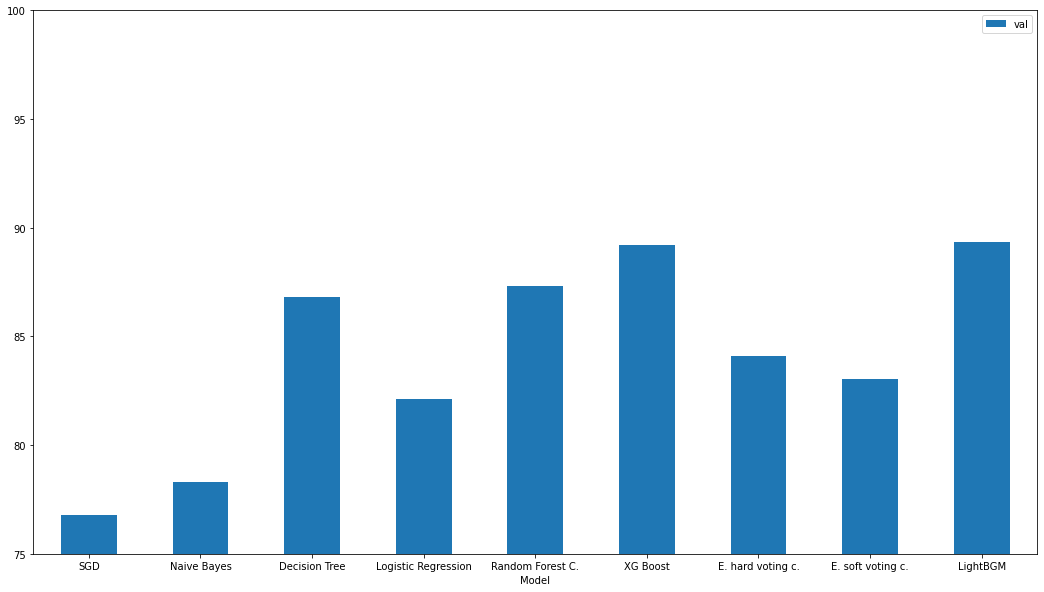

In [ ]:
df = pd.DataFrame({'Model':['SGD','Naive Bayes','Decision Tree','Logistic Regression','Random Forest C.',
                            'XG Boost','E. hard voting c.','E. soft voting c.','LightBGM'], 
                   'val':[76.76159897254776,78.31658372130357,86.80847648097608,82.11526729812168,87.33376143843313,89.20174666880719,
                          84.0767378391395,83.0274522395248,89.3583239685343]})
ax = df.plot.bar(x='Model', y='val', rot=0,figsize=(18,10),ylim=(75,100))

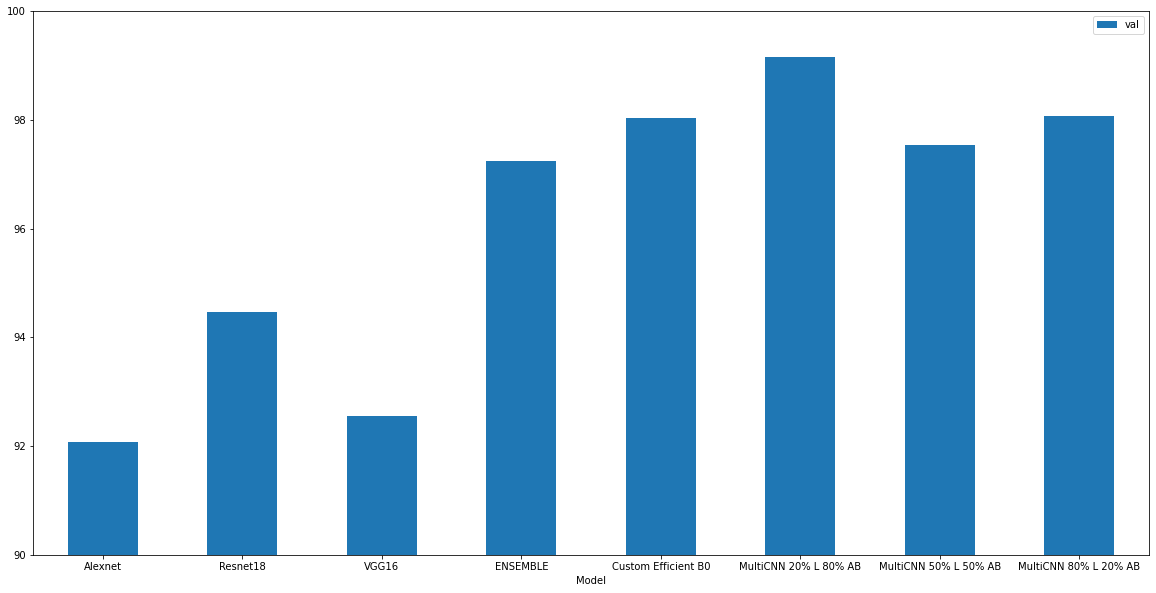

In [10]:
df = pd.DataFrame({'Model':['Alexnet','Resnet18','VGG16','ENSEMBLE','Custom Efficient B0','MultiCNN 20% L 80% AB',
                            'MultiCNN 50% L 50% AB','MultiCNN 80% L 20% AB'], 
                   'val':[92.08,94.47,92.55,97.25,98.04,99.16,97.53,98.08]})
ax = df.plot.bar(x='Model', y='val', rot=0,figsize=(20,10),ylim=(90,100))